In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adpkrp5/error.csv
/kaggle/input/adpkrp5/data1.csv
/kaggle/input/adpkrp5/content.csv


# 문제 1

#### dataset : pima-indians-diabetes-database [kaggle link](pima-indians-diabetes-database) - added post-processing
/kaggle/input/adpkrp5/data1.csv

### 1-1 탐색적 데이터 분석 수행(시각화 포함)

In [3]:
df1 = pd.read_csv('/kaggle/input/adpkrp5/data1.csv')
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# 결측치 확인
df1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

모든 변수에 결측치는 존재하지 않음

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


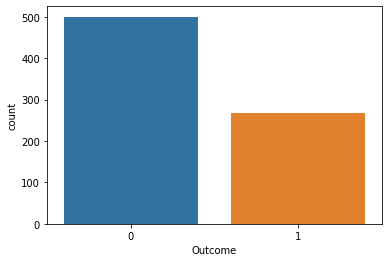

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df1['Outcome'])
plt.show()

종속변수 'Outcome'은 0, 1로 이루어져 있으므로 분류분석을 진행한다.

<AxesSubplot:>

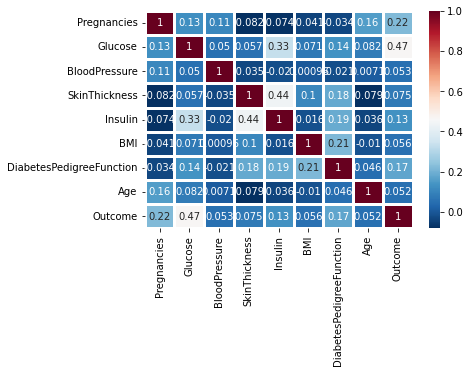

In [11]:
sns.heatmap(df1.corr(method='pearson'), xticklabels=df1.columns, yticklabels=df1.columns,
           cmap='RdBu_r', annot=True, linewidth=3)

모든 변수에 상관관계는 존재하지 않으며, 대부분 매우 낮게 나타났다.

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,81.976562,20.536458,79.799479,44.934766,0.471876,34.447917,0.348958
std,3.369578,31.972618,358.835058,15.952218,115.244002,359.739733,0.331329,36.754727,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,9999.000000,99.000000,846.000000,9999.000000,2.420000,999.000000,1.000000


'BloodPressure', 'Insulin', 'BMI', 'Age' 변수는 평균값과 최댓값의 차이가 크기 때문에 이상치를 확인할 필요가 있어보임

### 1-2 이상치 처리(이상값 대체방안 제시)

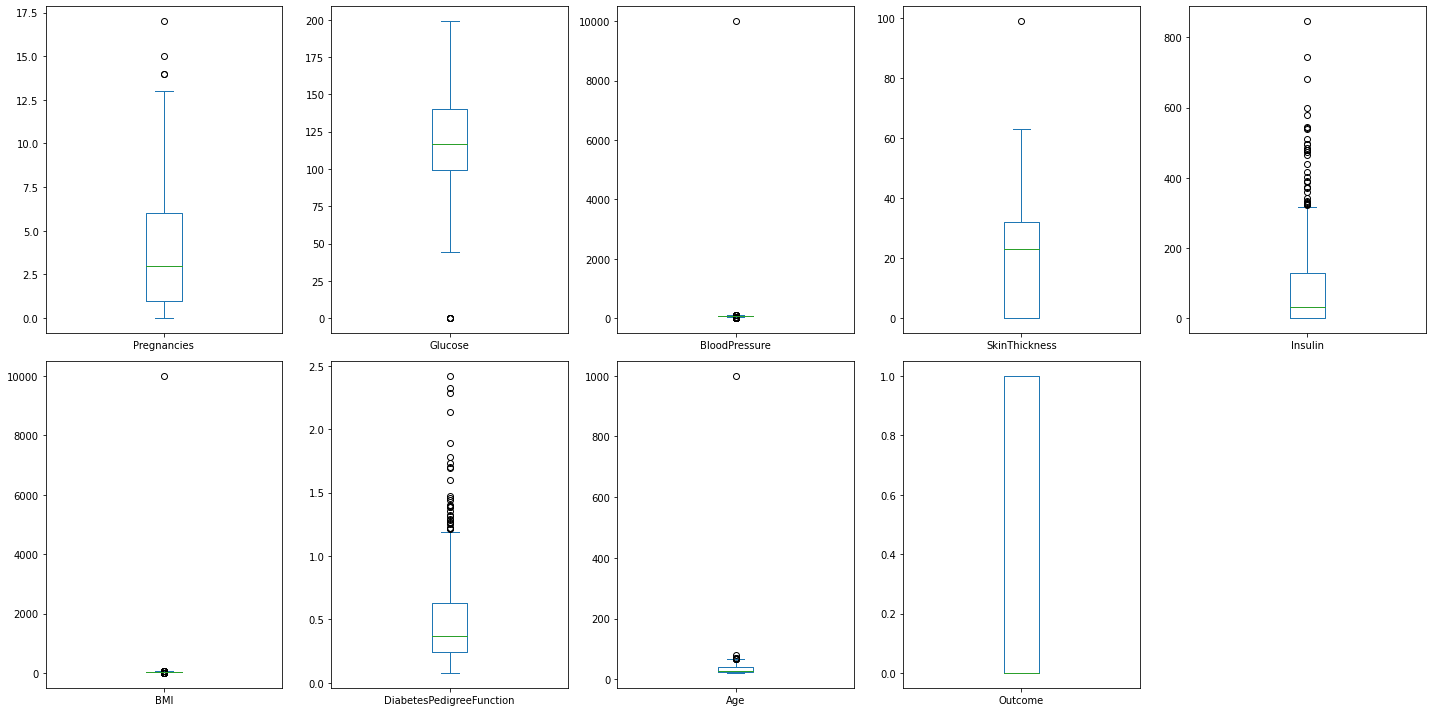

In [15]:
df1.plot(kind = 'box', subplots=True, layout = (2,5), figsize=(20,10))
plt.tight_layout()
plt.show()

Insulin, BMI, Age 변수에 이상치가 존재함

Insulin 변수와 BMI 변수의 이상치는 유의미한 이상치일 수 있으므로 현업의 의견이 필요하다고 판단

Age 변수는 150 이상 삭제

In [17]:
# 이상치 삭제 전
df1.shape

(768, 9)

In [19]:
df1 = df1[df1.Age <= 150]
df1.shape

(767, 9)

### 1-3 앞선 두 단계에서 얻은 향후 분석시 고려사항 작성

이상치를 처리하지 못한 데이터들은 현업의 의견을 구하여 유의미한 이상치들인지 확인 후 삭제 혹은 대치하여 분석의 품질을 높일수 있도록 한다.

# 문제 2

### 2-1 오버샘플링 과정 설명하고 결과 작성

오버 샘플링은 소수의 레이블을 지닌 데이터세트의 다수 레이블을 지닌 데이터세트의 수만큼 증식시켜 학습에 사용하기 위한 충분한 양과 비율의 데이터를 확보하는 기법이다. 데이터의 손실이 없어 일반적으로 언더 샘플링보다 성능이 유리하여 주로 사용된다.

1. Random Over Sampling 
- 소수의 레이블을 지닌 데이터셋을 단순 복제하여 다수의 레이블과 비율을 맞추는 방법
- 오버피팅의 위험성은 존재하지만 불균형 문제를 처리하지 않는 것보다는 유효함

2. SMOTE
- 소수 레이블을 지닌 데이터 셋의 관측 값에 대한 K개의 최근접 이웃을 찾고, 관측 값과 이웃으로 선택된 값 사이에 임의의 새로운 데이터를 생성하는 방법으로 샘플의 수를 늘리는 방법


-> 오버피팅의 위험이 있는 랜덤 오버 샘플링 방법 대신 SMOTE 방법을 사용하여 오버샘플링을 진행할 예정

In [22]:
from imblearn.over_sampling import SMOTE
from collections import Counter

X = df1.drop(columns = 'Outcome')
y = df1['Outcome']

print('오버 샘플링 전 y : ',Counter(y))

smote_sample = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote_sample.fit_resample(X, y)

print('SMOTE 후 y : ', Counter(y_sm))

오버 샘플링 전 y :  Counter({0: 499, 1: 268})
SMOTE 후 y :  Counter({1: 499, 0: 499})


SMOTE 기법을 적용한 뒤 y변수 중 1인 데이터의 개수가 268에서 499개로 증가한 것을 확인할 수 있다.(0인 데이터의 개수인 499과 같음)

### 2-2 언더샘플링 과정 설명하고 결과 작성

언더 샘플링은 다수의 레이블을 가진 데이터를 샘플링하여 소수의 데이터세트가 가진 레이블의 수 수준으로 감소시키는 기법이다. 이 기법을 사용하면 데이터 불균형으로 인한 문제는 피할 수 있지만, 전체 데이터의 수가 급격하게 줄어들어 오히려 학습 성능을 떨어 뜨리는 결과를 초래할 수 있다. 

Random Under Sampling
- 다수를 차지하는 레이블에서 무작위로 데이터를 제거하는 방법
- 다수 레이블의 데이터를 샘플링하여 소수 레이블의 데이터 수와 동일하게 줄임
- 0~1 사이의 숫자 값을 지정하면 소수 레이블의 데이터 수와 다수 레이블의 데이터 수가 해당 비율이 되도록 조정 가능

In [23]:
from imblearn.under_sampling import RandomUnderSampler

print('Under Sampling 전 : ', Counter(y))

undersample = RandomUnderSampler(sampling_strategy = 'majority')
x_under, y_under = undersample.fit_resample(X,y)
print('Under Sampling 후 : ', Counter(y_under))

Under Sampling 전 :  Counter({0: 499, 1: 268})
Under Sampling 후 :  Counter({0: 268, 1: 268})


다수 레이블인 0의 데이터수가 499개에서 268개로 감소함

### 2-3 둘 중 선택하고 이유 설명

오버 샘플링 기법인 SMOTE 방식을 선택한다. 언더 샘플링을 진행하게 되면 오히려 학습 성능이 떨어지게 될 수 있으며, 랜덤 오버 샘플링을 진행하면 과적합의 위험이 있기 때문이다.

# 문제 3

### 3-1 최소 3개 이상 알고리즘 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 꼭 구현(총 2개 이상)

정확도 측면에서 RandomForest모델을 사용하고, 속도 측면에서 LogisticRegressor 모델을 사용한다. 
또한 SVM 모델을 사용하여 모델의 성능을 비교한다.

### 3-2 모델 비교하고 결과 설명

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.2, stratify=y_sm, random_state = 0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(798, 8) (200, 8)
(798,) (200,)


In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 805 to 274
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               798 non-null    int64  
 1   Glucose                   798 non-null    int64  
 2   BloodPressure             798 non-null    int64  
 3   SkinThickness             798 non-null    int64  
 4   Insulin                   798 non-null    int64  
 5   BMI                       798 non-null    float64
 6   DiabetesPedigreeFunction  798 non-null    float64
 7   Age                       798 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 56.1 KB


In [53]:
# 로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import time

lr = LogisticRegression(solver='liblinear')

start = time.time()
lr.fit(X_train, y_train)
end = time.time()

lr_pred = lr.predict(X_test)
print(f'{end - start : .5f} sec')
print('Logistic Regression  정확도 : ', accuracy_score(y_test, lr_pred))
print('혼동 행렬 : \n', confusion_matrix(y_test, lr_pred))

 0.01096 sec
Logistic Regression  정확도 :  0.765
혼동 행렬 : 
 [[80 20]
 [27 73]]


In [52]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

start = time.time()
rf.fit(X_train, y_train)
end = time.time()

rf_pred = rf.predict(X_test)
print(f'{end - start : .5f} sec')
print('Random Forest 정확도 : ', accuracy_score(y_test, rf_pred))
print('혼동 행렬 : \n', confusion_matrix(y_test, rf_pred))

 0.19938 sec
Random Forest 정확도 :  0.785
혼동 행렬 : 
 [[84 16]
 [27 73]]


RandomForest 모델이 Logistic 모델보다 수행 시간은 느리지만 정확도는 약 0.78로 로지스틱보다 0.15 정도 높은 것을 확인하였다.

### 3-3 속도 개선을 위한 차원 축소 설명하고 수행, 예측 성능과 속도 비교하고 결과 작성

차원을 축소하는 가장 간단한 방법은 자료를 설명하는 데 몇 가지의 설명변수만을 선택하여 분석에 사용하는 방법이다. 간단하게 유용하지 않거나 상관관계가 높은 컬럼은 제거할 수 있다. 설명 변수 선택의 장점은 선택한 설명변수의 해석이 용이하고 수행 과정이 간단하다는 것이다. 하지만 설명변수 간의 고차원적인 상관관계는 고려하기 어렵다.

주성분 분석
- 차원축소에 가장 많이 사용되는 차원추출 방법으로 기존의 컬럼을 새롭게 해석하여 저차원의 초평면에 투영하는 것이다. 주성분 분석은 여러 변수 간에 존재하는 상관관계를 이용하는 차원축소 방법으로 데이터를 축에 사영했을 때 분산이 가장 높은 축을 찾아 그 축을 새로운 주성분으로 결정하는 방법이다.
- 가장 큰 분산을 기반으로 첫 번째 축을 생성하고, 이 벡터 축에 직각이 되는 벡터를 두번쨰 축으로 선택한다. 세번쨰 축은 다시 두 번쨰 축과 직각이 되는 벡터를 축으로 결정하여 충분히 설명할 수 있는 몇 개의 주성분으로 압축한다.

In [38]:
# 변수 간 스케일의 차이가 주성분 선정에 영향을 주는 것을 방지하기 위해 스케일링 진행
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_sc = sc.fit_transform(x_sm)

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 8)
pca_fit = pca.fit(X_sc)

print('고유값 : ', pca.singular_values_)
print('분산 설명력 : ', pca.explained_variance_ratio_)

고유값 :  [41.96353545 41.05850303 32.79481631 31.35026899 28.48500118 27.50720397
 21.91747921 20.74859564]
분산 설명력 :  [0.22055841 0.21114738 0.13470691 0.12310112 0.10162767 0.09477032
 0.06016732 0.05392087]


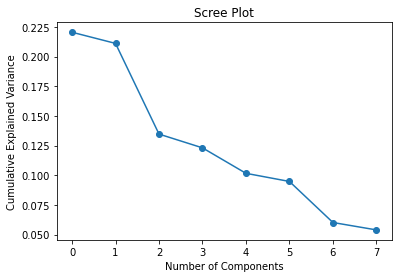

In [45]:
# Scree Plot으로 사용할 주성분의 개수 정하기
import matplotlib.pyplot as plt

plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.show()

주성분의 수는 5로 결정

In [54]:
pca = PCA(n_components=5)
sc = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, stratify=y_sm, random_state=0)
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

start = time.time()
lr.fit(X_train_pca, y_train)
end = time.time()

lr_pred = lr.predict(X_test_pca)

print(f'{end - start : .5f} sec')
print('정확도 : ', accuracy_score(y_test, lr_pred))

 0.00209 sec
정확도 :  0.69


In [55]:
start = time.time()
rf.fit(X_train_pca, y_train)
end = time.time()

rf_pred = rf.predict(X_test_pca)

print(f'{end - start : .5f} sec')
print('정확도 : ', accuracy_score(y_test, lr_pred))

 0.21627 sec
정확도 :  0.69


정확도는 0.69로 낮아졌지만 , 수행 속도가 빨라짐

# 문제 4 
금속 성분 함유량 데이터(변수 1개) - 제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 보고 있는데 제조사별로 차이가 난다고 제보를 받았으며, 분산에 대해 검정을 수행하시오. (유의확률 0.05)

#### dataset : /kaggle/input/adpkrp5/content.csv

### 4-1 연구가설과 귀무가설 작성

- 귀무가설 : 금속재질 함유량의 분산이 1.3이다
- 대립가설 : 금속재질 함유량의 분산은 1.3이상이다.

### 4-2 양측 검정

In [56]:
df2 = pd.read_csv('/kaggle/input/adpkrp5/content.csv')
df2.head()

,content
0,97.995295
1,101.478315
2,102.284913
3,98.993634
4,104.635232


데이터가정규성을 띄는지 판단
- 귀무가설 : 정규성을가짐
- 대립가설 : 정규성을 가지지 않음

In [58]:
import scipy.stats as stats
print(stats.shapiro(df2['content']))

ShapiroResult(statistic=0.9930017590522766, pvalue=0.4605061113834381)


p-value값이 0.05보다 크기 때문에 정규분포를 따른다고 판단함

In [62]:
n = len(df2)

def pvar_test(sample,var0, alpha = 0.05):
    u_var = np.var(sample,ddof=1)
    rv = stats.chi2(df=n-1)
    interval = rv.interval(1-alpha)
    
    y= (n-1) * u_var / var0
    if interval[0] >= y <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')
        
    if y < rv.isf(0.5):
        p = rv.cdf(y) * 2
    else:
        p = (1 - rv.cdf(y)) * 2
    print(f'p값은 {p:.3f}')

In [63]:
pvar_test(df2['content'], 1.3)

귀무가설을 기각
p값은 0.000


In [87]:
from scipy.stats import chi2
df = pd.read_csv('/kaggle/input/adpkrp5/content.csv')

def var_test(x, va0, direction = 'two-tailed', alpha = 0.05):
    n = len(x)
    Q = (n-1) * np.var(x) / va0
    print('direction', direction)
    
    if direction == 'lower':
        q = chi2.ppf(alpha, n-1)
        
        if Q <= q:
            return 'H_0 rejected'
        else:
            return 'H_0 not rejected'
        
    elif direction == 'upper':
        q = chi2.ppf(1-alpha, n-1)
        if Q >= q:
            return 'H_0 rejected'
        else:
            return 'H_0 not rejected'
        
    else:
        q1 = chi2.ppf(alpha/2, n-1)
        q2 = chi2.ppf(1 - (alpha/2), n-1)
        
        print('Q',Q)
        print('q1',q1)
        print('q2',q2)
        
        if Q <= q1 or Q >= q2:
            return 'H_0 rejected'
        else:
            return 'H_0 not rejected'
        
var_test(df2['content'], va0 = 1.3)

direction two-tailed
Q 326.6508365405755
q1 161.82618239364686
q2 239.9596818276442


'H_0 rejected'

### 4-3 검정통계량, 가설 채택

p-value값이 0.05보다작기 때문에 귀무가설을 기각하였다. 따라서 금속 함유량의 분산은1.3이라고 할 수없다.

# 문제 5
Lot별 200개에 대한 불량 제품 수량 데이터(변수 2개 - lot번호, 불량제품수)    
/kaggle/input/adpkrp5/error.csv

### 5-1 불량률 관리도에 따라 관리중심선(CL : Center Line), 관리 상한선(UCL : Upper Control Limit), 하한선(LCL : Lower Control Limit) 구하기

In [64]:
df3 = pd.read_csv('/kaggle/input/adpkrp5/error.csv')
df3.head()

,iot_number,error_case_number
0,1,4.5
1,2,2.5
2,3,2.0
3,4,3.0
4,5,0.5


In [65]:
df3.set_index('iot_number', inplace=True)
df3

,error_case_number
iot_number,
1,4.5
2,2.5
3,2.0
4,3.0
5,0.5
...,...
96,2.0
97,3.0
98,5.5


In [78]:
df3['p'] = df3['error_case_number'] / 200 * 100

std = np.std(df3['p'])
cl = np.mean(df3['p'])
ucl = cl + 3 * std
lcl = cl - 3 * std

print(f'CL : {cl :.3f}, UCL : {ucl :.3f}, LCL : {lcl:.3f}')

CL : 1.705, UCL : 6.654, LCL : -3.244


### 5-2 관리도 시각화

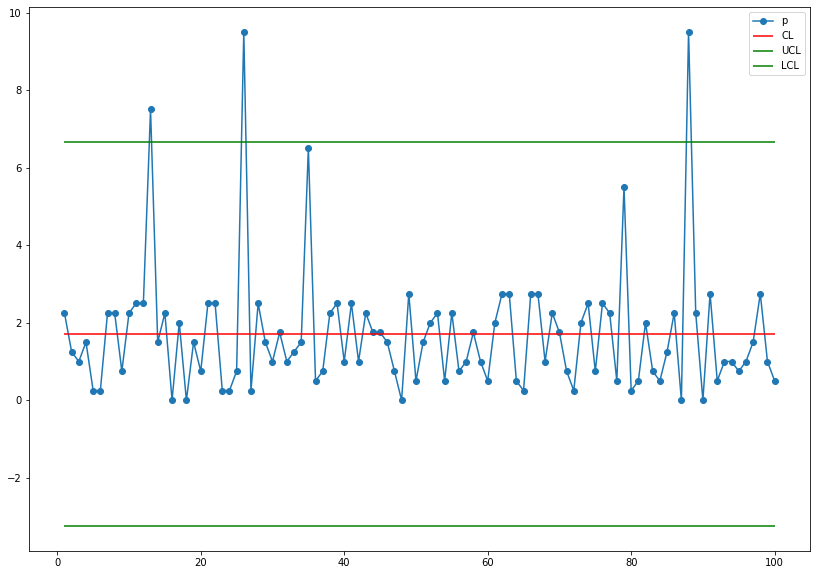

In [82]:
plt.figure(figsize = (14,10))
plt.plot(df3['p'], marker='o')
plt.hlines(cl, 1, len(df3),'r')
plt.hlines(ucl, 1, len(df3),'g')
plt.hlines(lcl, 1, len(df3), 'g')
plt.legend(['p', 'CL', 'UCL', 'LCL'])

# 문제 6
상품 a와 b가 있을 때 다음과 같은 구매 패턴이 있다고 한다. aa bb aaaa bbbb a b aa bb aa bbb aa bb a b 구매하는 패턴으로 보아 두 상품이 연관이 있는지 확인하라

### 6-1 연구가설과 귀무가설 작성

- 귀무가설 : 연속적인 관측값이 임의적이다. (연관성이 없다.)
- 대립가설 : 연속적인 관측값이 임의적이지 않다. (연관성이 있다.)

### 6-2 평균과 표준편차

In [83]:
a = 14
b = 15

mean = 2*a*b / (a+b) + 1
std = (2*a*b* (2*a*b-a-b) / (a+b)**2/(a+b-1))**0.5

print(f'mean : {mean}, std : {std}')

mean : 15.482758620689655, std : 2.6408030342821784


### 6-3 가설 채택

In [84]:
from statsmodels.sandbox.stats.runs import runstest_1samp

x = [1,1,0,0,1,1,1,1,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,0,0,1,0]
runstest_1samp(x, cutoff='mean', correction=True)

(-0.3721438547031917, 0.7097857460625617)

p-value값이 0.05보다 크기 때문에 귀무가설을 기각할 수없다. 따라서 상품 a, b의 구매에 연관이없다고 할 수 있다.